In [1]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.metrics import recall_score, f1_score ,roc_auc_score
import warnings
warnings.filterwarnings('ignore')

- outcome이 target

In [2]:
pima_df = pd.read_csv('sklearn_csv/pima_data.csv')
# pima_df
target = pima_df['Outcome'].tolist()
pima_df = pima_df.drop('Outcome',axis = 1)
# print(target)
pima_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [3]:
X_train, X_test, y_train, y_test = train_test_split(pima_df, target, test_size=0.2, random_state=156)
print(X_train.shape, X_test.shape)

(614, 8) (154, 8)


In [4]:
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [5]:
params = {'max_depth':3,
         'eta':0.1,
         'objective':'binary:logistic',
         'eval_metric':'logloss',
         'early_stoppings':100
         }
num_rounds = 400

In [6]:
# train 데이터 세트는 'train', evaluation(test) 데이터 세트는 'eval'로 명기합니다.
wlist = [(dtrain,'train'),(dtest,'eval')]
# 하이퍼 파라미터와 early stopping 파라미터를 train()함수의 파라미터로 전달
xgb_model = xgb.train(params=params, dtrain=dtrain, num_boost_round=num_rounds, early_stopping_rounds=100,evals=wlist)

[20:30:18] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { early_stoppings } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-logloss:0.64038	eval-logloss:0.66464
Multiple eval metrics have been passed: 'eval-logloss' will be used for early stopping.

Will train until eval-logloss hasn't improved in 100 rounds.
[1]	train-logloss:0.59488	eval-logloss:0.64303
[2]	train-logloss:0.55520	eval-logloss:0.62194
[3]	train-logloss:0.52205	eval-logloss:0.60514
[4]	train-logloss:0.49284	eval-logloss:0.59211
[5]	train-logloss:0.46548	eval-logloss:0.57822
[6]	train-logloss:0.44250	eval-logloss:0.56643
[7]	train-logloss:0.42190	eval-logloss:0.55684
[8]	train-logloss:0.40097	eval-logloss:0.54985
[9]	train-logloss:0.38146	eval-log

In [7]:
pred_probs =xgb_model.predict(dtest)
print('predict() 수행 결괏값을 10개만 표시, 예측 확률값으로 표시됨')
print(np.round(pred_probs[:10],3))

# 예측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측값 결정해 리스트 객체인 preds에 저장
preds = [1 if x > 0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시', preds[:10])

predict() 수행 결괏값을 10개만 표시, 예측 확률값으로 표시됨
[0.801 0.659 0.033 0.88  0.001 0.987 0.938 0.014 0.618 0.009]
예측값 10개만 표시 [1, 1, 0, 1, 0, 1, 1, 0, 1, 0]


In [8]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy,precision,recall,f1,roc_auc))

In [9]:
get_clf_eval(y_test, preds, pred_probs)

오차 행렬
[[80 17]
 [24 33]]
정확도: 0.7338, 정밀도: 0.6600, 재현율: 0.5789, F1: 0.6168, AUC:0.8012


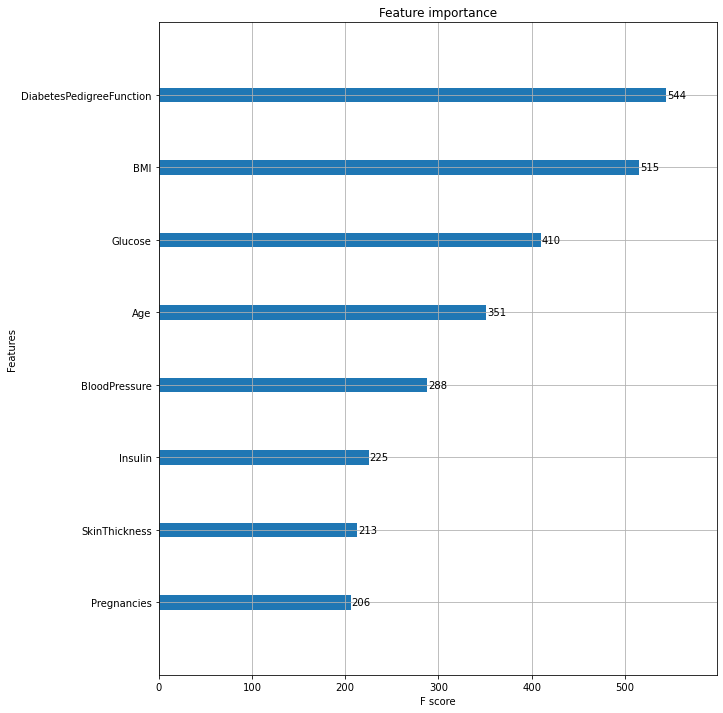

In [10]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig,ax = plt.subplots(figsize=(10,12))
plot_importance(xgb_model, ax=ax)